## Dataset:
La información recolectada por la empresa de retail se encuentra en un archivo CSV (`zara.csv`)

### Descripción de data:
1. ID de producto: Identificador único de cada producto.
2. Posición del producto: la posición del producto en el catálogo o diseño de la tienda.
3. Promoción: Indicador de si el producto se encuentra actualmente en promoción o no.
4. Categoría de producto: La categoría del producto, como ropa, accesorios, zapatos, etc.
5. Estacional: Indicador de si el producto forma parte de una colección de temporada específica.
6. Volumen de Ventas: La cantidad de productos vendidos.
7. Marca: Marca del producto.
8. URL: URL del producto (por ejemplo, si el producto se vende online).
9. SKU: Unidad de mantenimiento de existencias, un código único que se utiliza para identificar los artículos disponibles para la venta.
10. Nombre: Nombre del producto.
11. Descripción: Descripción del producto.
12. Precio: Precio del producto.
13. Moneda: Moneda del precio del producto.
14. Scraped_at: el momento en que se extrajeron los datos (por ejemplo, en el proceso de raspado web).
15. Términos: Términos o condiciones del producto.
16. Sección: Sección o categoría donde se vende el producto en la tienda (p. ej., ropa de mujer, ropa de hombre, ropa de niño, etc.).

In [1]:
# Conectar
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Conectar base
data = pd.read_csv("/content/drive/MyDrive/Zara Sales/zara.csv", sep = ';')

In [4]:
# Revisar data
print(data.shape)
data.head()

(252, 16)


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [5]:
# Numero de columnas:
data.shape

(252, 16)

In [6]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [7]:
# Nombre de columnas
data.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')

In [8]:
# Valores
data.isnull().sum(axis = 0)

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [9]:
# Duplicados
data.duplicated().sum()

0

##El set de datos
La información recolectada de Zara cuenta con 250 filas y 16 columnas.
Tenemos cero registros duplicados

In [10]:
#Columnas
data.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')

In [11]:
#Renombrar columnas
data.rename(columns={'Product ID': 'Product_ID'}, inplace=True)
data.rename(columns={'Product Position': 'Product_Position'}, inplace=True)
data.rename(columns={'Product Category': 'Product_Category'}, inplace=True)
data.rename(columns={'Sales Volume': 'Sales_Volume'}, inplace=True)
data.rename(columns={'name': 'Product_Name'}, inplace=True)
data.rename(columns={'price': 'Price'}, inplace=True)
data.rename(columns={'brand': 'Brand'}, inplace=True)
data.rename(columns={'description': 'Description'}, inplace=True)
data.rename(columns={'currency': 'Currency'}, inplace=True)
data.rename(columns={'section': 'Section'}, inplace=True)
data.rename(columns={'scraped_at': 'Scraped_at'}, inplace=True)
data.rename(columns={'terms': 'Terms'}, inplace=True)

In [12]:
# Reemplazo:
data.loc[ data["Section"] == "WOMAN", "Section"] = "Woman"
data.loc[ data["Section"] == "MAN", "Section"] = "Man"

In [13]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Product_ID', 'Product_Position', 'Promotion', 'Product_Category',
       'Seasonal', 'Sales_Volume', 'Brand', 'url', 'sku', 'Product_Name',
       'Description', 'Price', 'Currency', 'Scraped_at', 'Terms', 'Section'],

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna ['Product_ID', 'Product_Position', 'Promotion', 'Product_Category', 'Seasonal', 'Sales_Volume', 'Brand', 'url', 'sku', 'Product_Name', 'Description', 'Price', 'Currency', 'Scraped_at', 'Terms', 'Section']: Product_ID          252
Product_Position      3
Promotion             2
Product_Category      1
Seasonal              2
Sales_Volume        234
Brand                 1
url                 228
sku                 228
Product_Name        194
Description         221
Price                28
Currency              1
Scraped_at          229
Terms                 5
Section               2
dtype: int64 subniveles


In [14]:
#Verifiquemos lo que ocurre con las columnas numéricas:
data.describe()

,Product_ID,Sales_Volume,Price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


In [15]:
#Descripción de valores
data[["Sales_Volume", "Price"]].describe()

,Sales_Volume,Price
count,252.000000,252.000000
mean,1823.702381,86.252540
std,697.703748,52.083205
min,529.000000,7.990000
25%,1243.000000,49.900000
50%,1839.500000,79.900000
75%,2398.750000,109.000000
max,2989.000000,439.000000


## Analizar datos:

In [30]:
# Sacar la ganancia
data['Total_Price'] = data['Price'] * data['Sales_Volume']

In [17]:
#Cantidad de ventas por section
pd.DataFrame(data.groupby("Section")["Tolta_Price"].sum())

,Total_Price
Section,
Man,35712663.03
Woman,3275813.45


In [43]:
#Cantidad de ventas por posición del producto
pd.DataFrame(data.groupby("Product_Position")["Sales_Volume"].sum())

,Sales_Volume
Product_Position,
Aisle,177396
End-cap,152930
Front of Store,129247


In [18]:
#Productos mas vendidos
pd.DataFrame(data.groupby("Terms")["Total_Price"].sum())

,Total_Price
Terms,
jackets,26581815.87
jeans,864385.25
shoes,3754837.63
sweaters,4090631.48
t-shirts,3696806.25


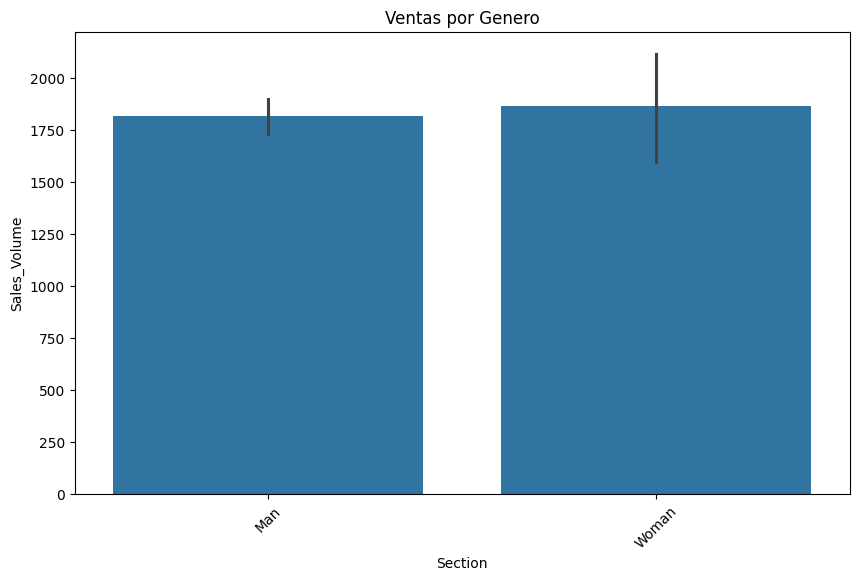

In [40]:
#Cantidad de ventas por genero

plt.figure(figsize=(10, 6))
sns.barplot(x='Section', y='Sales_Volume', data=data)
plt.title('Ventas por Genero')
plt.xlabel('Section')
plt.ylabel('Sales_Volume')
plt.xticks(rotation=45)
plt.show()

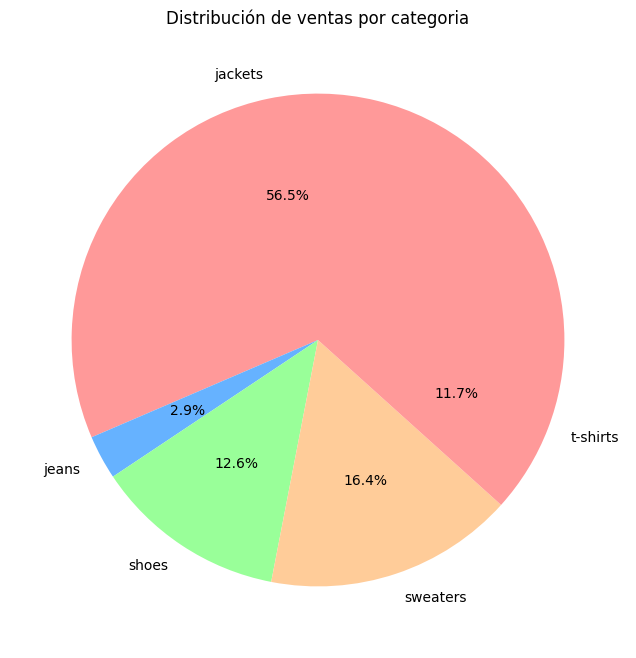

In [34]:
#Ventas por categoria
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(8, 8))
sales_by_terms = data.groupby('Terms')['Sales_Volume'].sum()
plt.pie(sales_by_terms, labels=sales_by_terms.index, autopct='%1.1f%%', colors=custom_colors)
plt.title('Distribución de ventas por categoria')
plt.show()


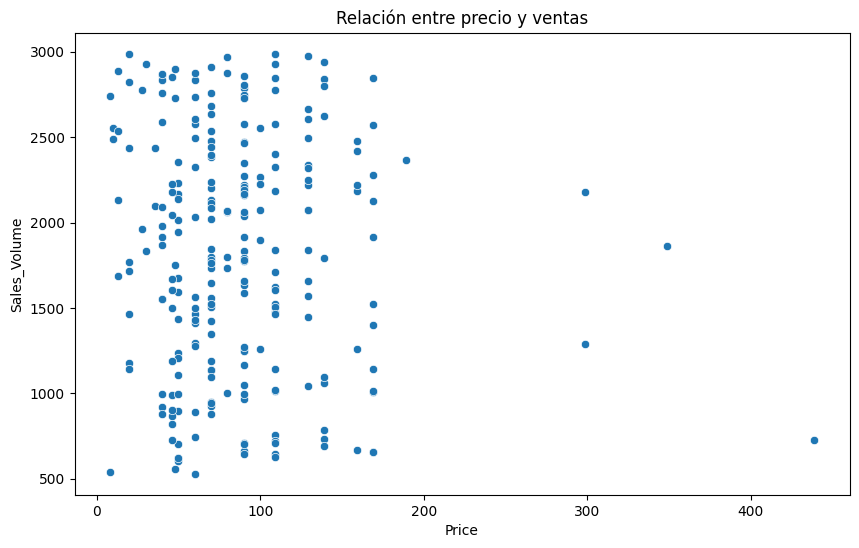

In [41]:
#Ventas por categoria

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Sales_Volume', data=data)
plt.title('Relación entre precio y ventas')
plt.xlabel('Price')
plt.ylabel('Sales_Volume')
plt.show()

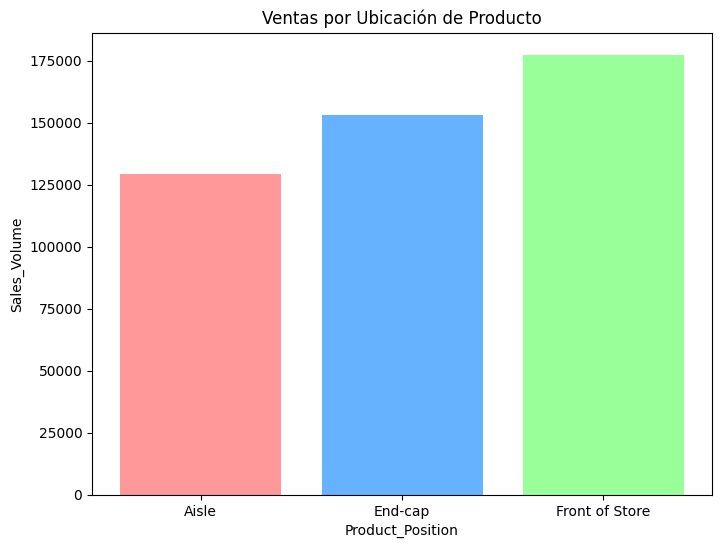

In [46]:
#Posición de productos con mas ventas
Product_Position = ['Aisle', 'End-cap', 'Front of Store']
Sales_Volume = [129247, 152930, 177396]
colores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(8, 6))
plt.bar(Product_Position, Sales_Volume, color=colores)

plt.title('Ventas por Ubicación de Producto')
plt.xlabel('Product_Position')
plt.ylabel('Sales_Volume')

plt.show()
